In [43]:
import numpy as np
np.random.seed(42)

import random
random.seed(42)

In [55]:
#Load data in and create ratings matrix
#Do we remove zero columns?
import pandas
import numpy as np

ratings_df = pandas.read_csv('ratings.csv')
ratings_df_np = ratings_df.to_numpy()

#Use max values to determine matrix dimensions
max_movie = np.amax(ratings_df_np[:,1])
max_userID = np.amax(ratings_df_np[:,0])


ratings_mat = np.zeros((max_userID.astype(int), max_movie.astype(int)))

for row in ratings_df_np:
    sel_movie = row[1].astype(int)
    sel_userID = row[0].astype(int)
    sel_rating = row[2].astype(int)
    
    #Make user 1 be index 0, etc.
    ratings_mat[sel_userID - 1, sel_movie - 1] = sel_rating

#Remove zero columns
idx = np.argwhere(np.all(ratings_mat[..., :] == 0, axis=0))
ratings_mat = np.delete(ratings_mat, idx, axis=1)

In [62]:
#Q1

sparsity = np.count_nonzero(ratings_mat)/(np.prod(ratings_mat.shape))
print("Sparsity is: {:.10f}".format(sparsity))


Sparsity is: 0.0169359178


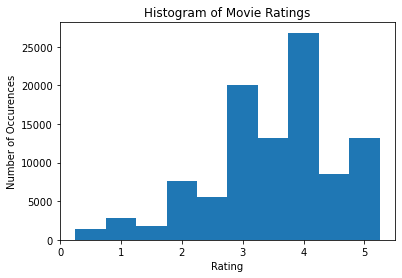

In [57]:
#Q2

import matplotlib.pyplot as plt

#Get all exisiting ratings (ignoring no reviews)
ratings = ratings_df_np[:,2]

plt.hist(ratings, bins=[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25])
plt.xlabel("Rating")
plt.title("Histogram of Movie Ratings")
plt.ylabel("Number of Occurences")
plt.show()

#Looks normally distributed, mean around 3.5-4
#Nobody gave a review of 0/5

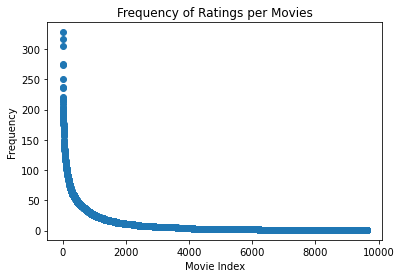

In [58]:
#Q3

freqs = np.count_nonzero(ratings_mat, axis=0)

freqs = np.sort(freqs)
movie_ind = np.flip(np.arange(freqs.shape[0]))
plt.scatter(movie_ind,freqs)
plt.xlabel("Movie Index")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings per Movies")
plt.show()

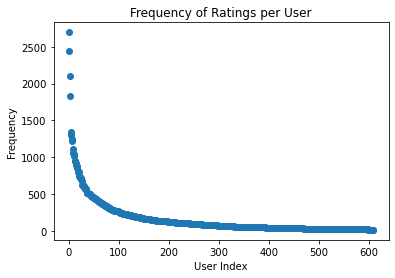

In [59]:
#Q4

freqs = np.count_nonzero(ratings_mat, axis=1)

freqs = np.sort(freqs)
movie_ind = np.flip(np.arange(freqs.shape[0]))
plt.scatter(movie_ind,freqs)
plt.xlabel("User Index")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings per User")
plt.show()

In [ ]:
#Q5

#Recommendations will be heavily weighted towards a few hundred movies.